In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import matplotlib.pyplot as plt
import seaborn as sns
import shap as shap


In [2]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 7.8 MB/s eta 0:00:00


In [3]:
#load the dataset
train = pd.read_csv("/content/training.csv")
test = pd.read_csv("/content/test.csv")
print("Number of train samples are",train.shape)
print("Number of test samples are",test.shape)

Number of train samples are (12906, 83)
Number of test samples are (5792, 82)


In [6]:
train.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,...,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,...,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0
4,817482,NaN,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0


In [7]:
# Descriptive statistics for the training set
train_descriptive_stats = train.describe()

# Descriptive statistics for the test set
test_descriptive_stats = test.describe()

# Display the results
display(train_descriptive_stats)

display(test_descriptive_stats)


,patient_id,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
count,12906.000000,12906.000000,12906.000000,3941.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,...,12905.000000,12902.000000,12902.000000,12905.000000,12905.000000,12905.000000,12877.000000,12877.000000,12877.000000,12906.000000
mean,547381.196033,573.754300,59.183326,28.984539,20744.441237,1581.950419,40.502259,11.122784,12.945265,13.290376,...,13.335299,13.406950,4.474956,27.978387,8.575284,7.083376,39.822352,7.475221,16.098988,0.624516
std,260404.959974,275.447534,13.335216,5.696906,13886.903756,2966.305306,4.036963,1.512376,1.923974,3.354103,...,3.690949,5.222495,4.837085,5.083939,4.203482,3.109022,3.559492,1.516499,5.842501,0.484266
min,100063.000000,101.000000,18.000000,14.000000,635.545455,0.916667,20.600000,0.000000,6.314286,5.925000,...,4.600000,3.433333,0.000000,12.460784,2.440000,1.200000,30.939316,2.636008,2.760371,0.000000
25%,321517.000000,331.000000,50.000000,24.660000,9463.896552,171.857143,37.129825,10.160000,11.741176,11.013415,...,10.270492,9.663333,0.994444,24.933333,5.618750,4.929688,37.698880,6.651215,11.280694,0.000000
50%,543522.000000,554.000000,59.000000,28.190000,19154.190480,700.337500,40.639344,11.039216,12.923944,12.538095,...,12.884000,12.177778,2.747222,27.788235,7.465714,6.847059,39.108249,7.686577,15.589148,1.000000
75%,772671.750000,846.000000,67.000000,32.920000,30021.278690,1666.515385,42.934783,12.190000,14.019767,14.971053,...,15.555405,16.635556,5.976000,30.709375,10.617442,8.620000,41.136513,8.276922,20.801880,1.000000
max,999896.000000,999.000000,91.000000,85.000000,71374.131580,21172.000000,54.570000,17.675000,35.300000,62.100000,...,35.155556,38.347826,26.755000,48.020000,27.566102,25.200000,52.237210,11.169408,31.504775,1.000000


,patient_id,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,...,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02
count,5792.000000,5792.000000,5792.000000,1777.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,...,5792.000000,5792.000000,5791.000000,5791.000000,5792.000000,5792.000000,5792.000000,5778.000000,5778.000000,5778.000000
mean,549946.787983,570.217887,59.274862,28.900073,20266.872152,1510.471786,40.575472,11.119250,12.919191,13.218348,...,18.036444,13.483574,13.435855,4.292997,27.915686,8.636586,7.171897,39.788771,7.435363,15.936645
std,260988.833446,275.314510,13.076323,5.609491,13694.738314,2883.409750,4.029852,1.478579,1.909698,3.294389,...,16.716396,3.693358,5.105505,4.673928,4.997893,4.142770,3.107104,3.486773,1.528655,5.894659
min,100266.000000,101.000000,18.000000,14.000000,829.515152,0.821739,20.600000,0.000000,6.314286,5.925000,...,0.194444,4.600000,3.433333,0.000000,13.722078,2.440000,1.200000,30.939316,2.636008,2.760371
25%,320284.500000,329.000000,50.000000,24.600000,8863.550000,161.925000,37.190476,10.160000,11.726471,10.996226,...,4.698529,10.388889,9.995000,0.878049,24.932500,5.772727,5.078571,37.722740,6.590523,11.100666
50%,553042.000000,554.000000,59.000000,28.150000,18711.016665,626.236667,40.640909,11.039216,12.923944,12.531646,...,11.842623,13.093333,12.218182,2.690196,27.561905,7.468000,7.070370,39.127948,7.666953,15.246437
75%,778552.250000,836.000000,67.000000,32.860000,28996.772730,1612.851111,43.085938,12.143396,13.904830,14.937500,...,27.594872,15.802128,16.444444,5.863830,30.709375,10.820000,8.774510,41.075217,8.276922,20.348878
max,999890.000000,996.000000,91.000000,43.900000,71374.131580,21172.000000,54.570000,16.481818,35.300000,62.100000,...,91.005085,35.155556,38.347826,22.591667,48.020000,27.566102,21.426667,52.237210,11.169408,31.504775


In [8]:
# Get the data types of each column
data_types = train.dtypes

# Count the number of unique values for each data type
unique_counts = data_types.value_counts()

# Print the results
print("Data types and their corresponding count of unique values:")
for data_type, count in unique_counts.items():
    print(f"{data_type}: {count}")

Data types and their corresponding count of unique values:
float64: 68
object: 11
int64: 4


In [9]:
# Check for missing values in the training data
missing_values_train = train.isnull().sum()
print("Missing values in the training data:")
print(missing_values_train[missing_values_train > 0])

Missing values in the training data:
patient_race                         6385
payer_type                           1803
patient_state                          51
bmi                                  8965
metastatic_first_novel_treatment    12882
                                    ...  
health_uninsured                        1
veteran                                 1
Ozone                                  29
PM25                                   29
N02                                    29
Length: 75, dtype: int64


Text(0.5, 1.0, 'Missing values in training Data')

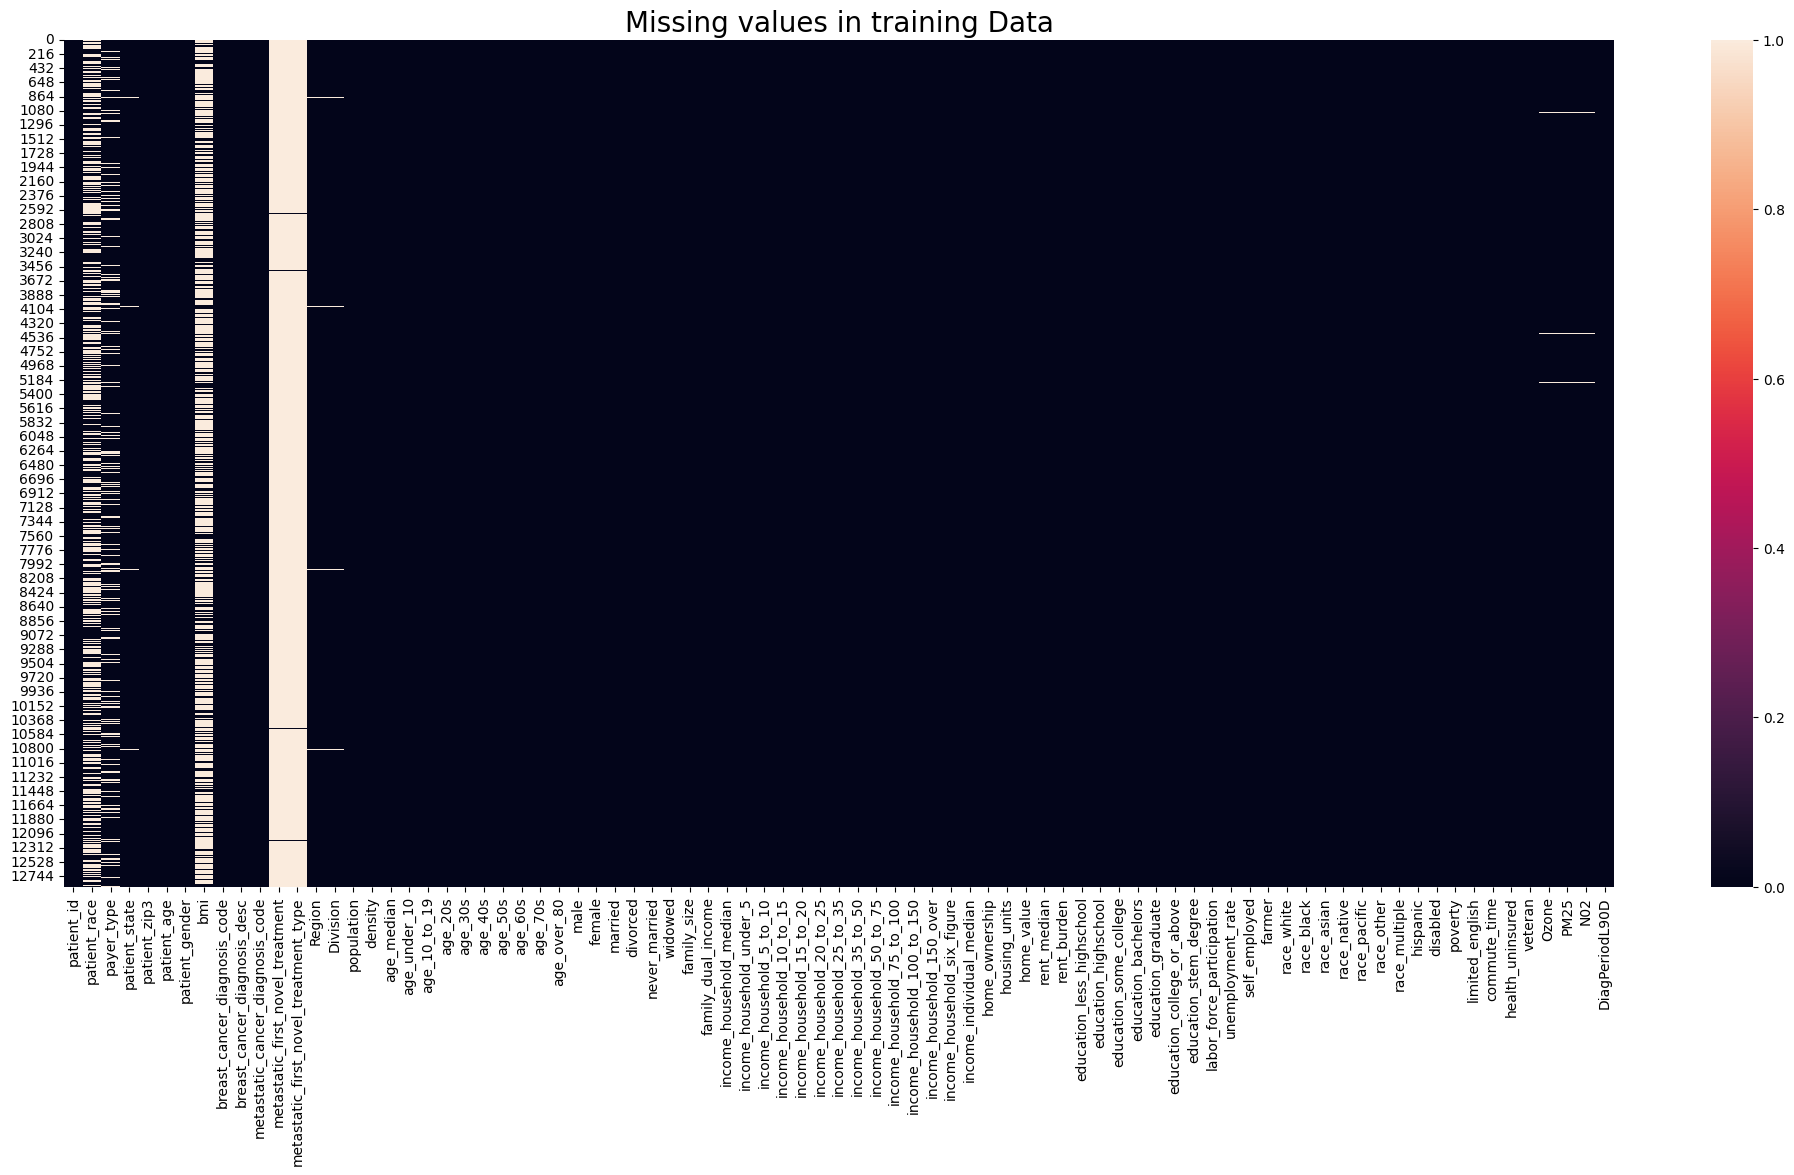

In [10]:
names = train.columns
plt.figure(figsize = (25,11))
sns.heatmap(train.isna().values, xticklabels=train.columns)
plt.title("Missing values in training Data", size=20)

In [11]:
ORANGE, BOLD, RESET = '\033[93m', '\033[1m', '\033[0m'
#check the details of missing value in each feature
missing_info = train.isna().mean() * 100
missing_info = missing_info[missing_info > 0].sort_values(ascending=False)

for column, missing_percentage in missing_info.items():
    print(f"{BOLD}{column}{RESET} has {BOLD}{ORANGE}{train[column].isna().sum()}{RESET} missing values, which is {BOLD}{ORANGE}{missing_percentage:.2f}%{RESET} of the column.")

metastatic_first_novel_treatment has 12882 missing values, which is 99.81% of the column.
metastatic_first_novel_treatment_type has 12882 missing values, which is 99.81% of the column.
bmi has 8965 missing values, which is 69.46% of the column.
patient_race has 6385 missing values, which is 49.47% of the column.
payer_type has 1803 missing values, which is 13.97% of the column.
Region has 52 missing values, which is 0.40% of the column.
Division has 52 missing values, which is 0.40% of the column.
patient_state has 51 missing values, which is 0.40% of the column.
PM25 has 29 missing values, which is 0.22% of the column.
Ozone has 29 missing values, which is 0.22% of the column.
N02 has 29 missing values, which is 0.22% of the column.
income_household_75_to_100 has 4 missing values, which is 0.03% of the column.
income_household_150_over has 4 missing values, which is 0.03% of the column.
income_household_15_to_20 has 4 missing values, which is 0.03% of the column.
income_household_20_t

In [12]:
# drop columns with high percentage of missing values
lst = train.isna().sum() / len(train)
p = pd.DataFrame(lst)
p.reset_index(inplace=True)
p.columns = ['a', 'b']
low_count = p[p['b'] > 0.45]
todelete = low_count['a'].values
# print the columns that we chosen to delete.
print("\nthe columns with > 45% missing values are:")
print(todelete)
train.drop(todelete, axis=1, inplace=True)
test.drop(todelete, axis=1, inplace=True)

train.drop(["patient_gender"],axis =1, inplace=True)
test.drop(["patient_gender"],axis =1, inplace=True)
print("Number of train samples are",train.shape)
print("Number of test samples are",test.shape)


the columns with > 45% missing values are:
['patient_race' 'bmi' 'metastatic_first_novel_treatment'
 'metastatic_first_novel_treatment_type']
Number of train samples are (12906, 78)
Number of test samples are (5792, 77)


In [13]:
from sklearn.impute import SimpleImputer

# Identify columns with missing values
missing_columns = [col for col in train.columns if train[col].isnull().any()]

# Count the number of missing values per column
missingvalues_count = train.isna().sum()

# Create a DataFrame with columns and their corresponding missing values count (excluding columns with no missing values)
missingValues_df = pd.DataFrame(missingvalues_count.rename('Null Values Count')).loc[missingvalues_count.ne(0)]

# Identify categorical and numerical features
categorical_features = train.select_dtypes(include=['object']).columns
numerical_features = train.select_dtypes('number')

# Define a function to find the intersection of two lists
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

# Find missing columns that are categorical or numerical
cat_miss = intersection(missing_columns, categorical_features)
num_miss = intersection(missing_columns, numerical_features)

# Impute missing values in categorical features
if len(cat_miss) > 0:
    cat_imputer = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value="unknown")
    train[cat_miss] = cat_imputer.fit_transform(train[cat_miss])
    test[cat_miss] = cat_imputer.fit_transform(test[cat_miss])

# Use Simple Imputer for numerical features (using median as an example)
num_imputer = SimpleImputer(missing_values=np.nan, strategy="median")
train[num_miss] = num_imputer.fit_transform(train[num_miss])
test[num_miss] = num_imputer.fit_transform(test[num_miss])

# Uncomment the following lines to use KNN imputer
# from sklearn.impute import KNNImputer
# knn_imputer = KNNImputer(n_neighbors=10, weights="uniform")


In [14]:
print(train.isnull().sum())

patient_id        0
payer_type        0
patient_state     0
patient_zip3      0
patient_age       0
                 ..
veteran           0
Ozone             0
PM25              0
N02               0
DiagPeriodL90D    0
Length: 78, dtype: int64




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



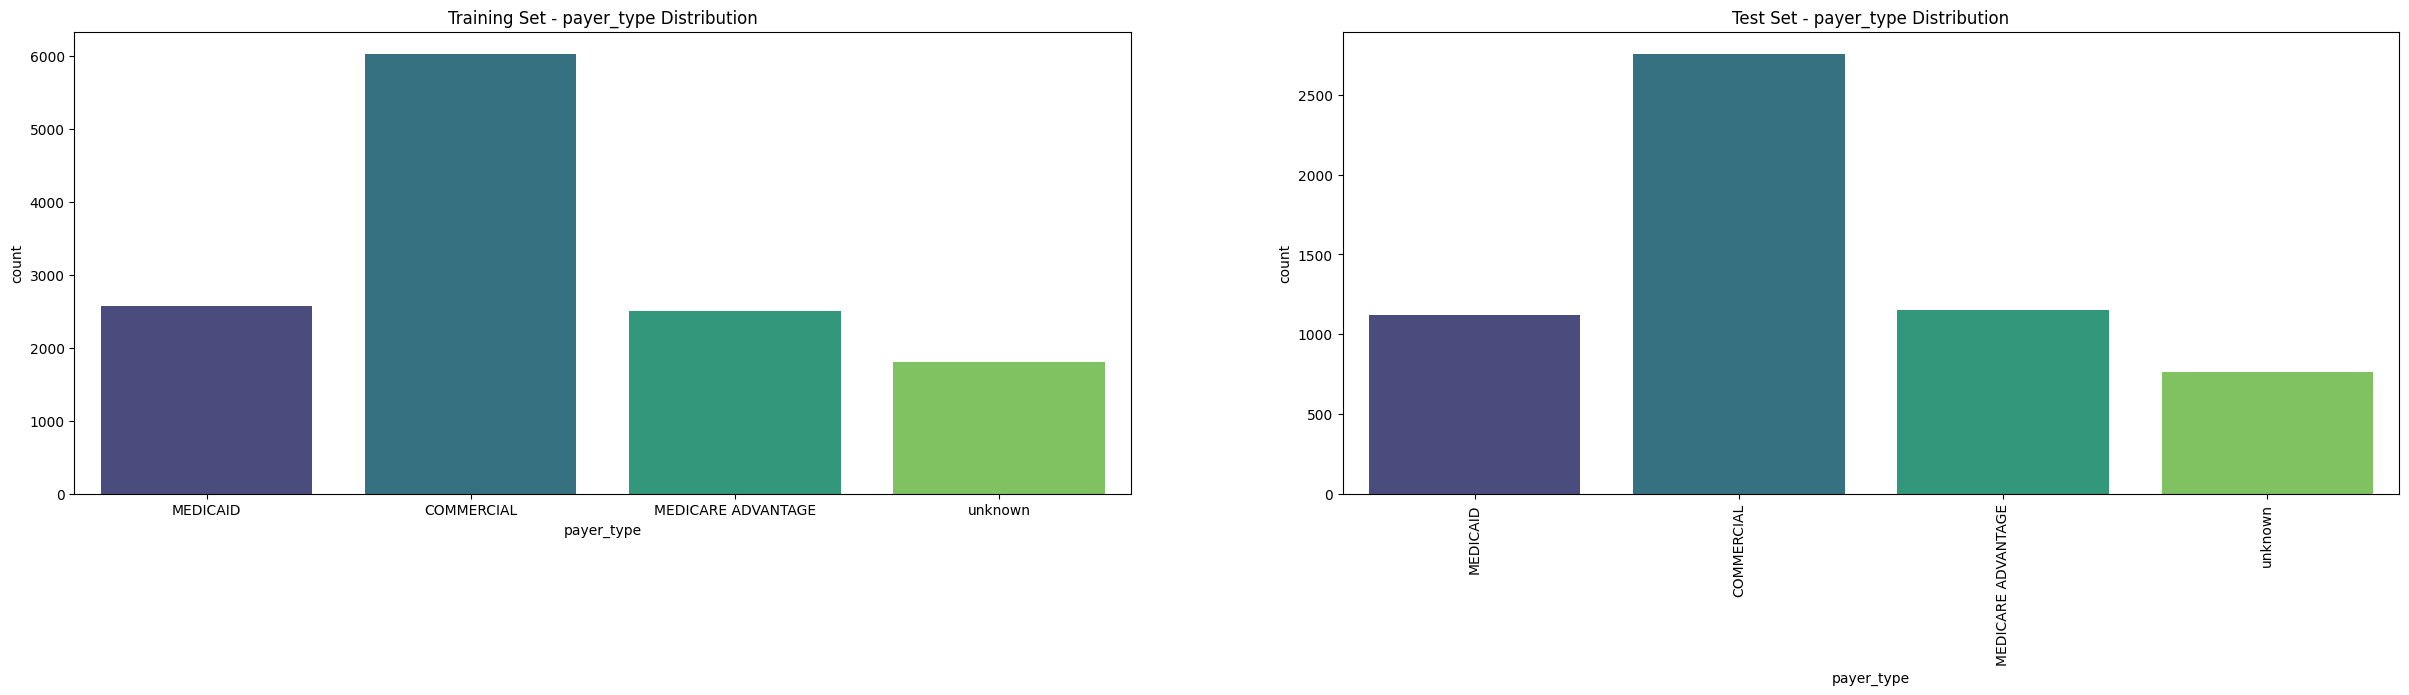



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



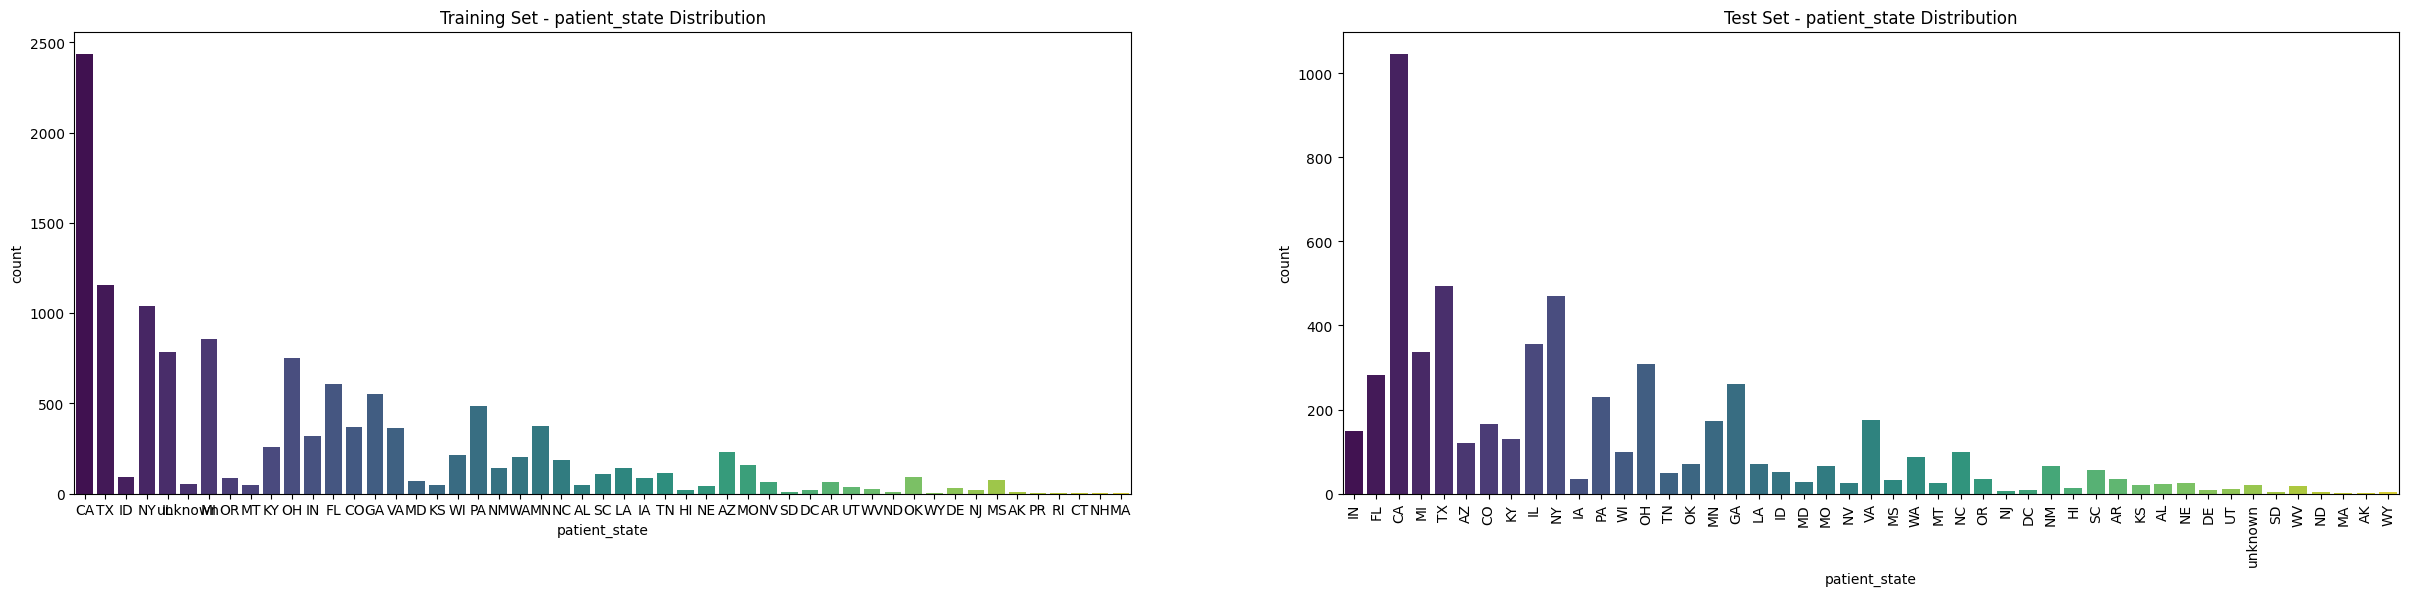



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



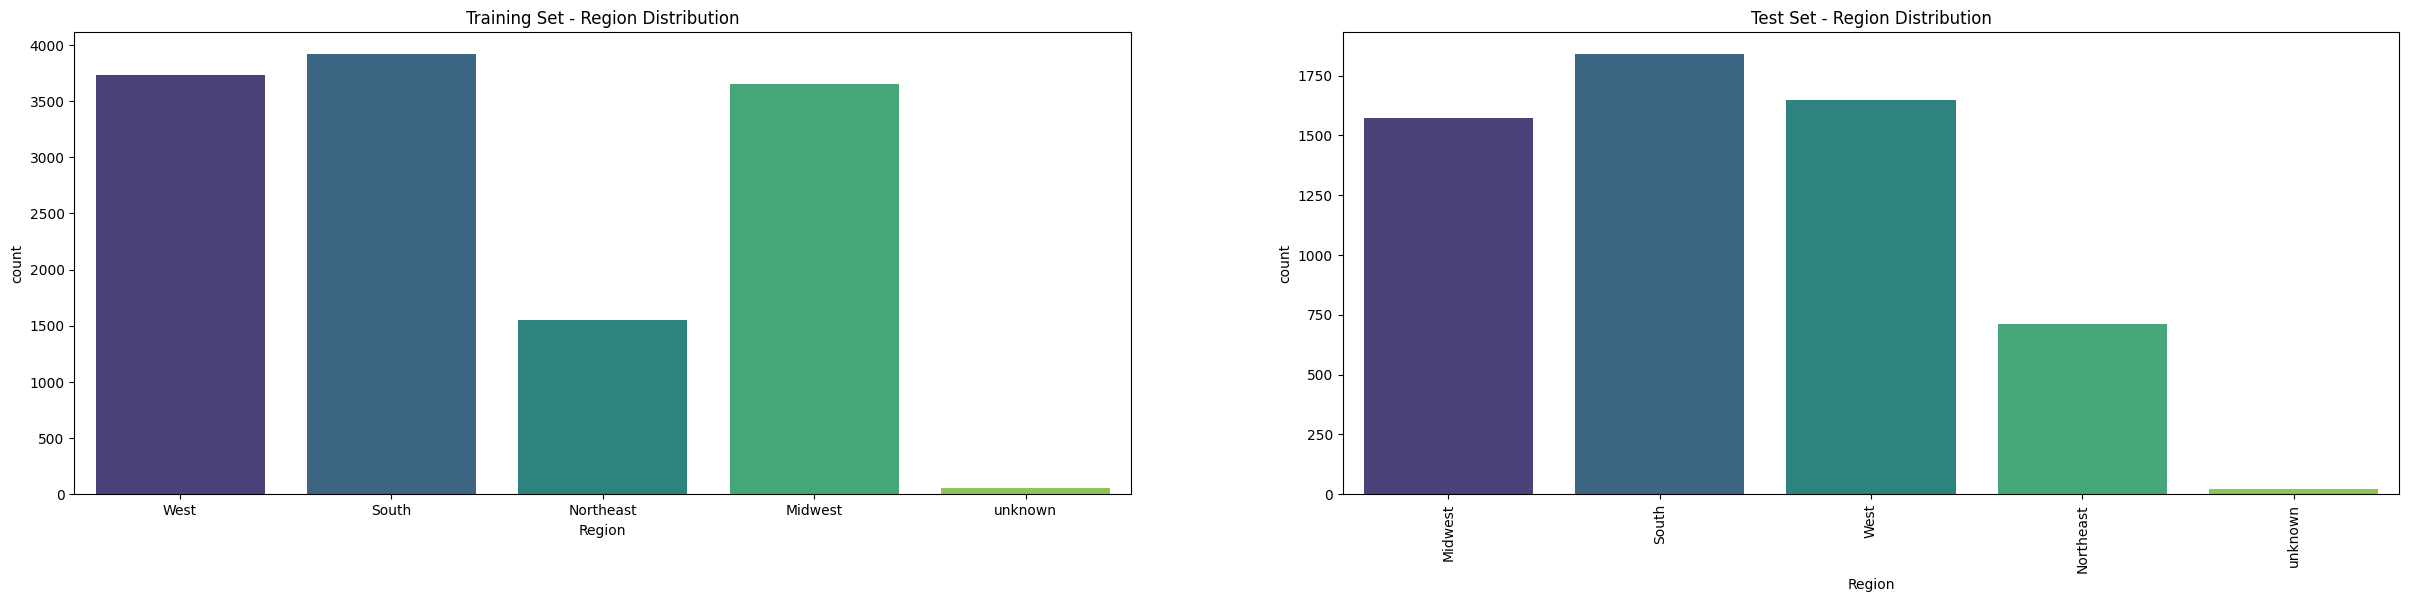



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



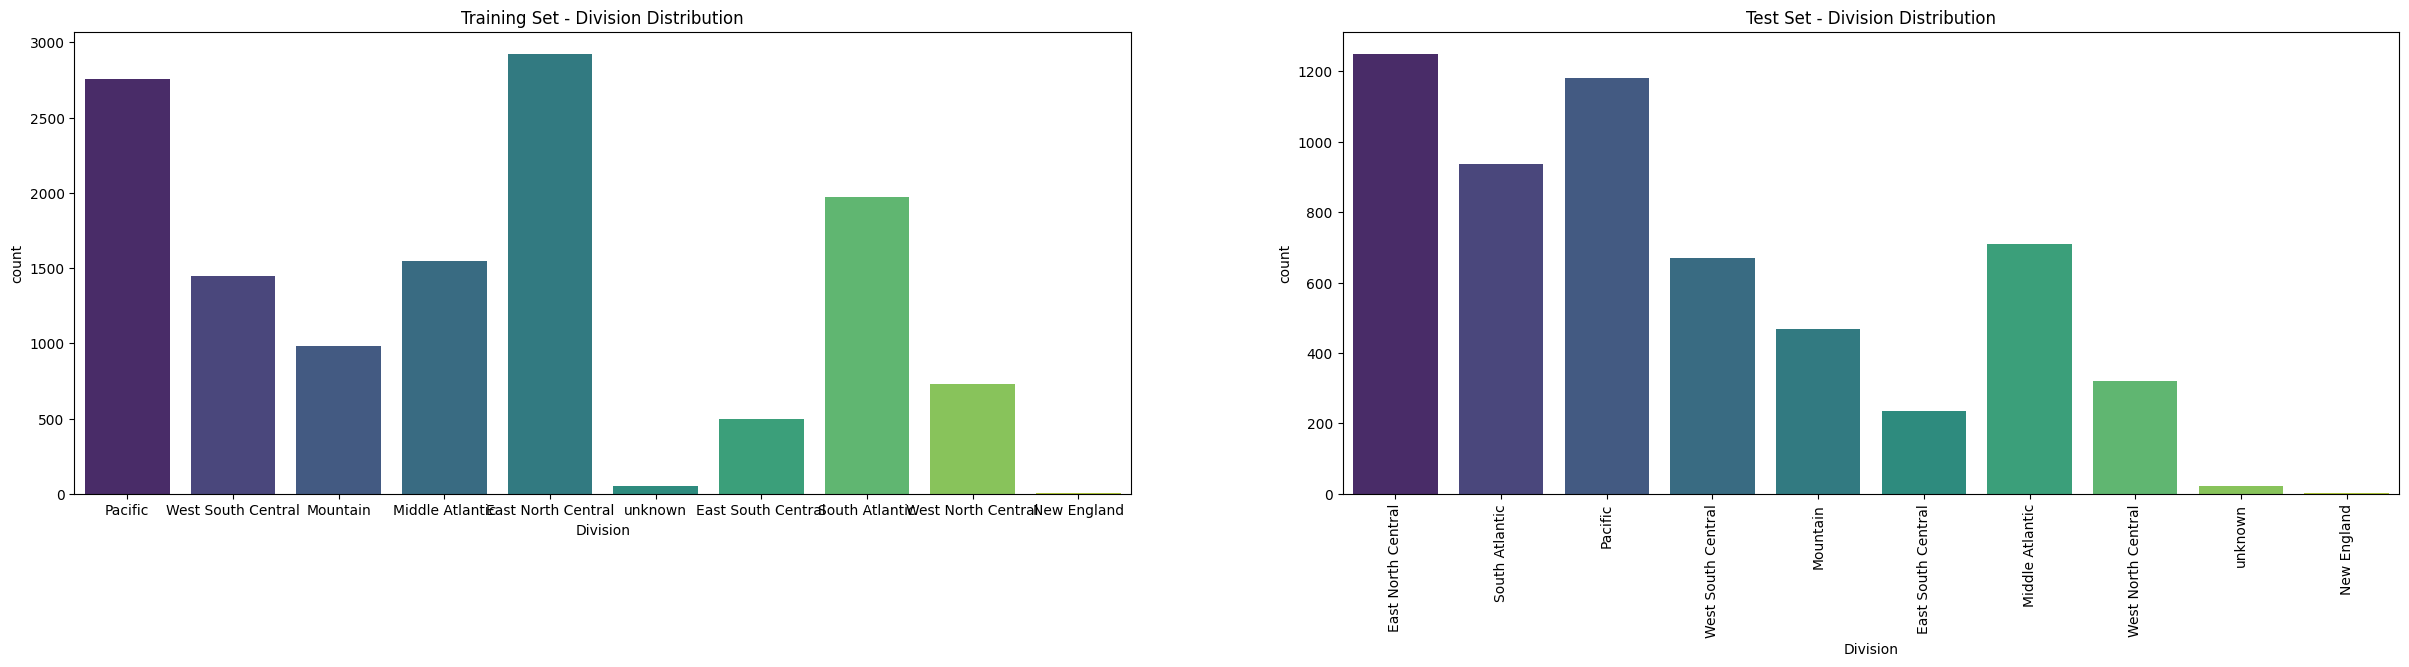

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_categorical_distribution(train, test, categorical_features):
    for feature in categorical_features:
        plt.figure(figsize=(30, 6))
        plt.subplot(1, 2, 1)
        sns.countplot(data=train, x=feature, palette='viridis')
        plt.title(f'Training Set - {feature} Distribution')

        plt.subplot(1, 2, 2)
        sns.countplot(data=test, x=feature, palette='viridis')
        plt.title(f'Test Set - {feature} Distribution')

        # Set rotation for x-axis labels
        for label in plt.gca().get_xticklabels():
            label.set_rotation(90)

        plt.show()

# List of categorical features
categorical_features_to_check = ['payer_type', 'patient_state', 'Region', 'Division']

# Plot the distribution
plot_categorical_distribution(train, test, categorical_features_to_check)


In [16]:
# Identify the target column
target_column = 'DiagPeriodL90D'

# Select numerical features from the training set
numerical_features = train.select_dtypes('number').columns.tolist()

# Exclude the target column from the list of numerical features
numerical_features.remove(target_column)

num_features_count = len(numerical_features)
print(f"Number of numerical features: {num_features_count}")

Number of numerical features: 70


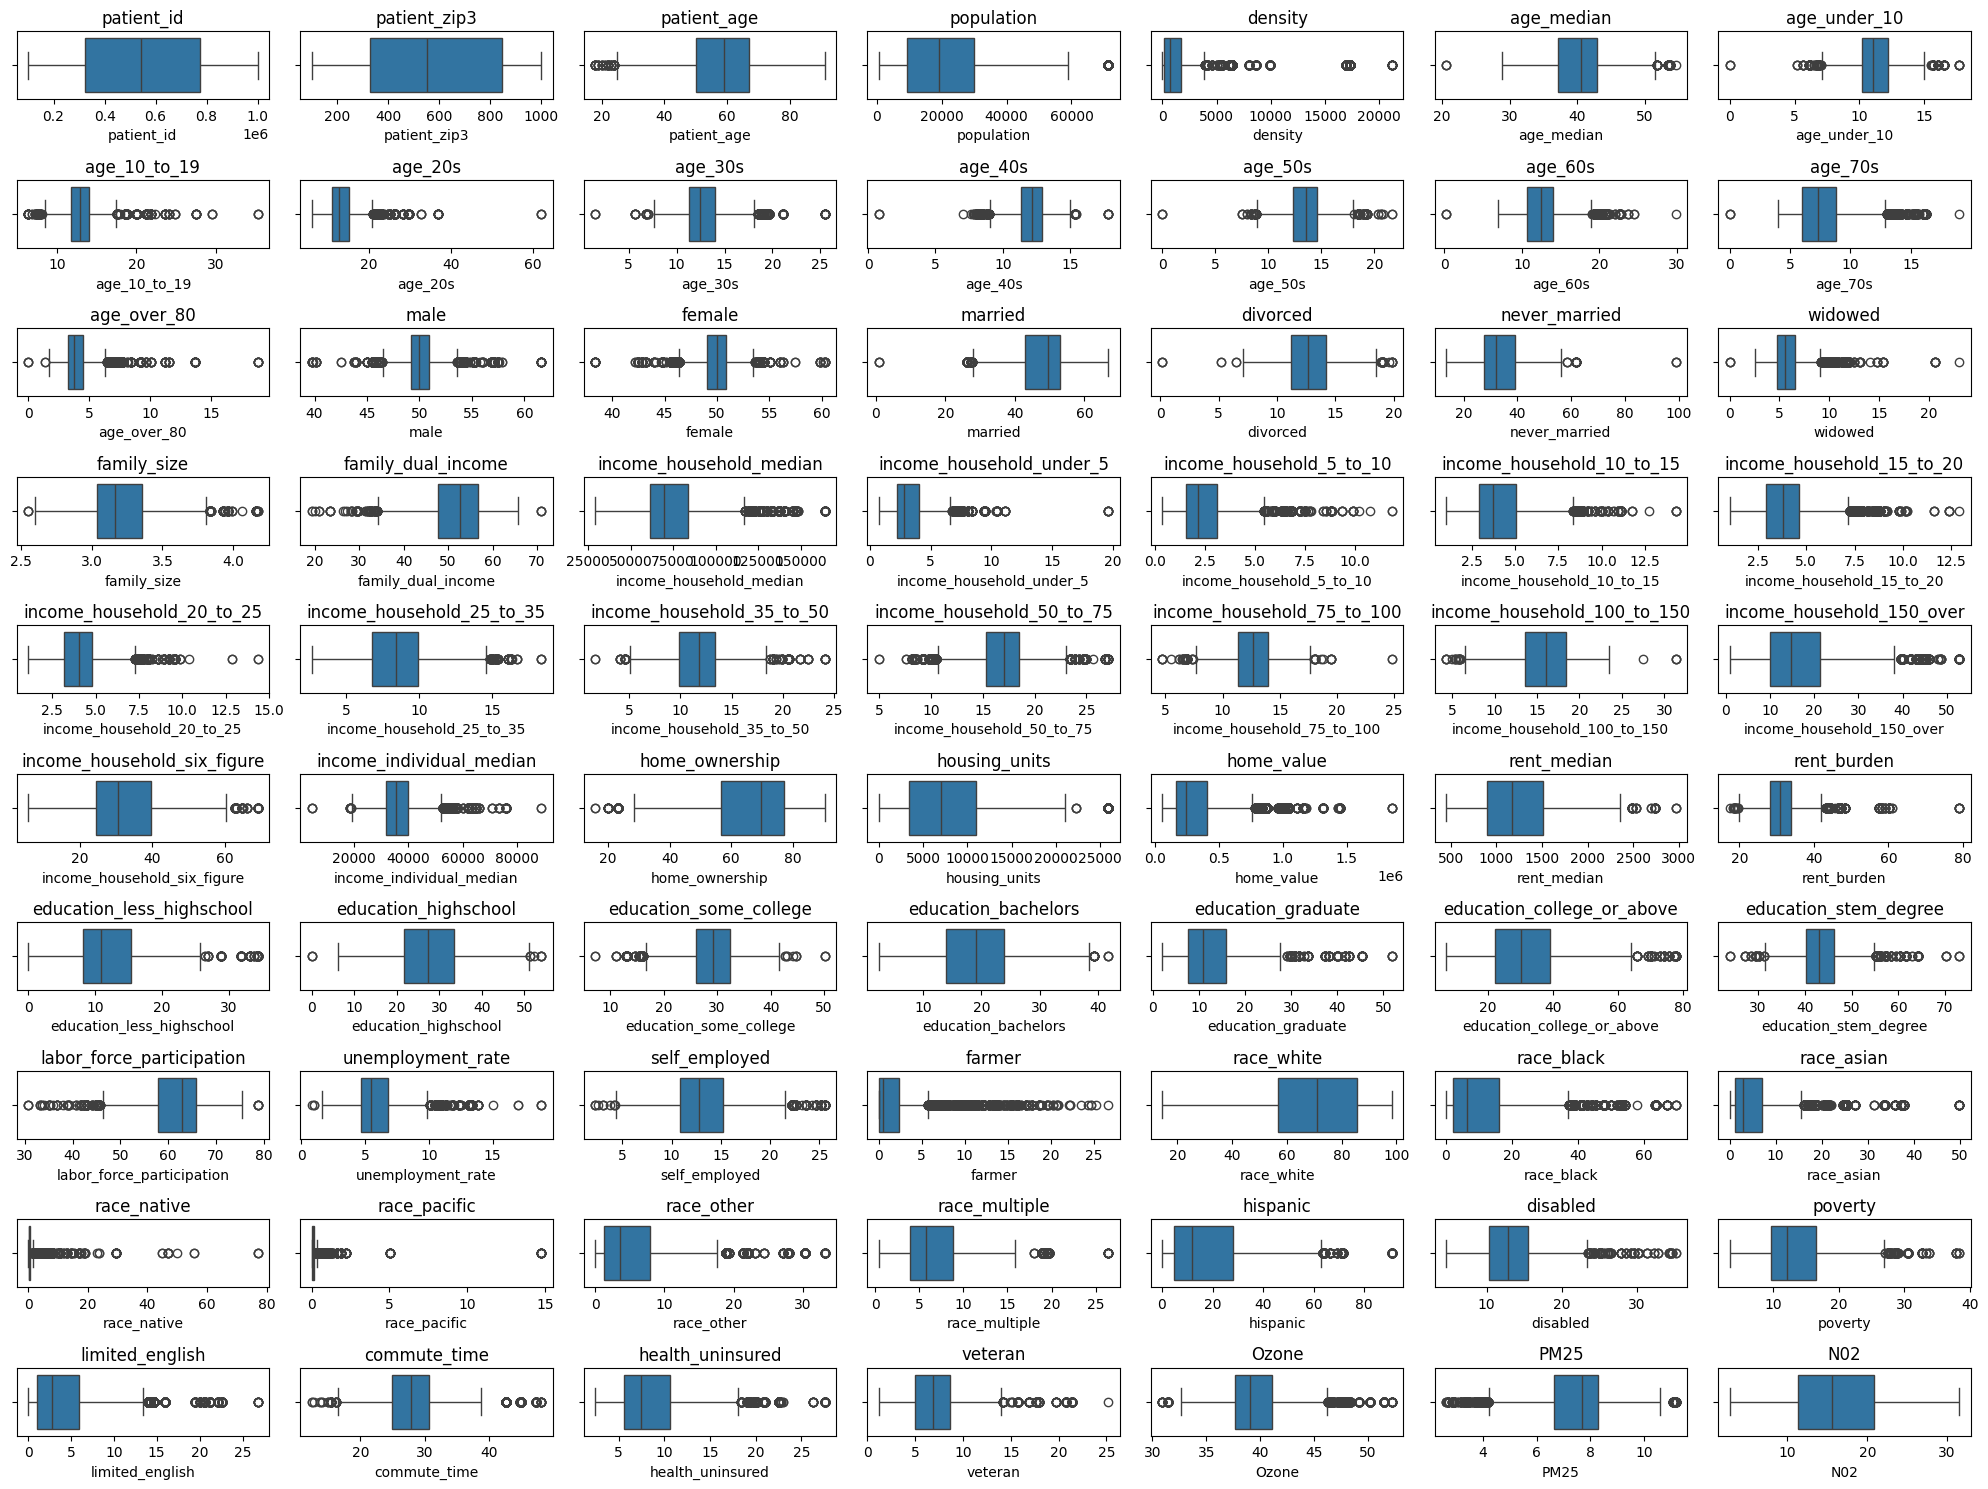

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_outliers(data, numerical_features, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(20, 15))

    # Flatten the axes array for ease of indexing
    axes = axes.flatten()

    for i, feature in enumerate(numerical_features):
        sns.boxplot(x=data[feature], ax=axes[i])
        #axes[i].set_title(f'Box Plot for {feature}')
        axes[i].set_title(f'{feature}')

    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Specify the number of rows and columns for the grid
rows = 10  # You can adjust this based on the number of features
cols = 7

# Visualize outliers in the training set
visualize_outliers(train, numerical_features, rows, cols)



In [18]:
#outlier detection

#### If you want to inspect outliers or use some type of flag features if the sample is an outlier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

#iso = LocalOutlierFactor(n_neighbors=35, contamination=0.01)
iso = IsolationForest(contamination=0.01)
num_train = train.select_dtypes('number')
outliers = iso.fit_predict(num_train)
# select all rows that are not outliers
# Identify the indices of outliers in the original dataset
outlier_indices = num_train.index[outliers == -1]

# Display the rows that were removed
removed_rows = num_train.loc[outlier_indices]
print("Removed Rows (Outliers):")
print(removed_rows)
train = train[outliers!=-1]


X does not have valid feature names, but IsolationForest was fitted with feature names


Removed Rows (Outliers):
       patient_id  patient_zip3  patient_age    population       density  \
107        661451           104           47  58934.160000  16936.584000   
146        846369           246           43   2498.360000     29.392000   
153        915900           941           50  29859.758620   7971.313793   
236        225060           200           60  25266.518520   6156.214815   
380        839781           409           54   2111.100000     18.683333   
...           ...           ...          ...           ...           ...   
12234      266381           414           61   3986.666667     14.750000   
12438      980020           941           44  29859.758620   7971.313793   
12699      735740           409           59   2111.100000     18.683333   
12726      269858           803           64  21435.000000   1413.250000   
12823      884163           947           51  14753.800000   4547.400000   

       age_median  age_under_10  age_10_to_19    age_20s    ag

In [19]:
#encoding
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()
categorical_features = ['payer_type', 'patient_state', 'Region', 'Division', 'breast_cancer_diagnosis_code',
       'breast_cancer_diagnosis_desc', 'metastatic_cancer_diagnosis_code']
for col in categorical_features:
    train[col] = label_encoder.fit_transform(train[col])
    test[col] = label_encoder.fit_transform(test[col])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [20]:
#remove columns with low variation

def remove_feature_with_low_var(df, threshold=0.1):
    for col in df.columns:
        if df[col].std() < threshold:
            df = df.drop([col], axis=1)
    return df


#remove correlations
numerical_features = train.select_dtypes('number').columns
num_feature = [col for col in numerical_features]
drop_columns = []
# Create correlation matrix
corr_matrix = train[num_feature].corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

# Find index of feature columns with correlation greater than 0.98
to_drop = [column for column in upper.columns if any(upper[column] > 0.98)]
train.drop(to_drop, inplace=True, axis=1)
test.drop(to_drop, inplace=True, axis=1)


In [21]:
#Separating the target variable

target = train["DiagPeriodL90D"]
train = train.drop(["DiagPeriodL90D"],axis =1)
temp_test = test
column_names = train.columns


In [22]:
## Standardize the data
#scaling
scaler = StandardScaler()
train = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

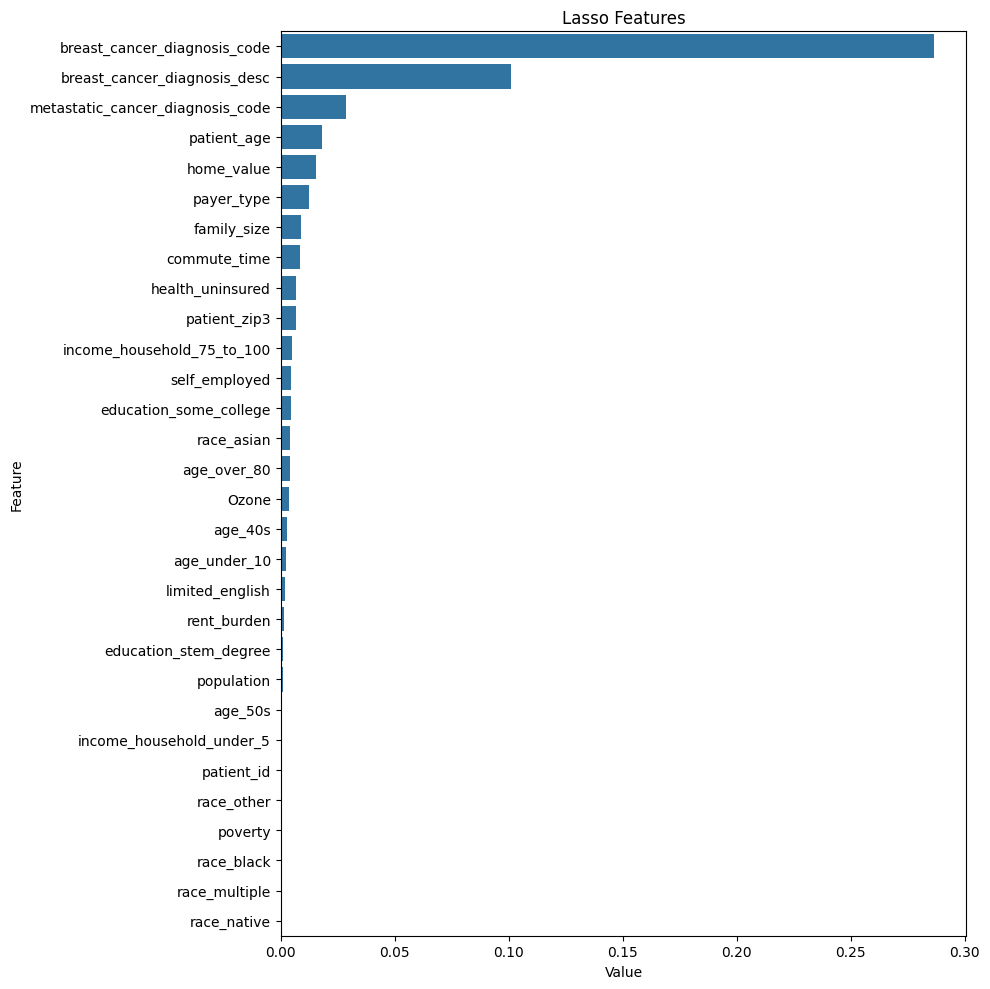

In [23]:
from sklearn.linear_model import LassoCV
lasso = LassoCV().fit(train, target)
importance = np.abs(lasso.coef_)
feature_names = np.array(column_names)

feat_ind = np.argsort(importance)[::-1]
totlasso = 20
feature_imp = pd.DataFrame(columns=['Value','Feature'])
feature_imp.loc[:,'Value'] = importance
feature_imp.loc[:,'Feature'] = column_names

feature_imp = pd.DataFrame(sorted(zip(importance, column_names)), columns=['Value','Feature'])
data = feature_imp.sort_values(by="Value", ascending=False)
data = data.iloc[0:30, :]
plt.figure(figsize=(10, 10))
sns.barplot(x="Value", y="Feature", data=data)
plt.title('Lasso Features')
plt.tight_layout()
plt.show()

#if we want to use only the selected fetures by LASSO to train the classifiers
#X_train = pd.DataFrame(train,columns = column_names)
#train = X_train.iloc[:, feat_ind]
#X_test = pd.DataFrame(test, columns = column_names)
#test = X_test.iloc[:, feat_ind]
#column_names = train.columns


## a different feature selection method, forward sequential feature selector
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=30,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

#sfs.fit(train, target)
#sfs.k_feature_names_

#if we want to use only the selected fetures by SFS to train the classifiers
#train = pd.DataFrame(train, columns = column_names)
#test = pd.DataFrame(test, columns = column_names)
#train = train[list(sfs.k_feature_names_)]
#test = test[list(sfs.k_feature_names_)]


In [24]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print(y_pred)
# Convert probabilities to binary predictions using a threshold of 0.5
y_binary_predictions = (y_pred >= 0.5).astype(int)
print(y_binary_predictions)


[1 1 0 ... 1 1 1]
[1 1 0 ... 1 1 1]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 434  500]
 [ 296 1326]]


0.6885758998435054

In [ ]:
# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_binary_predictions))

# Evaluate the model using classification report
print("\nClassification Report:")
print(classification_report(y_test, y_binary_predictions))

# Calculate and print individual metrics
accuracy = accuracy_score(y_test,y_binary_predictions)
precision = precision_score(y_test, y_binary_predictions)
recall = recall_score(y_test, y_binary_predictions)
f1 = f1_score(y_test, y_binary_predictions)

print("\nIndividual Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[ 434  500]
 [ 296 1326]]

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.46      0.52       934
           1       0.73      0.82      0.77      1622

    accuracy                           0.69      2556
   macro avg       0.66      0.64      0.65      2556
weighted avg       0.68      0.69      0.68      2556


Individual Metrics:
Accuracy: 0.6885758998435054
Precision: 0.7261774370208105
Recall: 0.8175092478421702
F1 Score: 0.7691415313225057


AUC: 0.6410886710302928


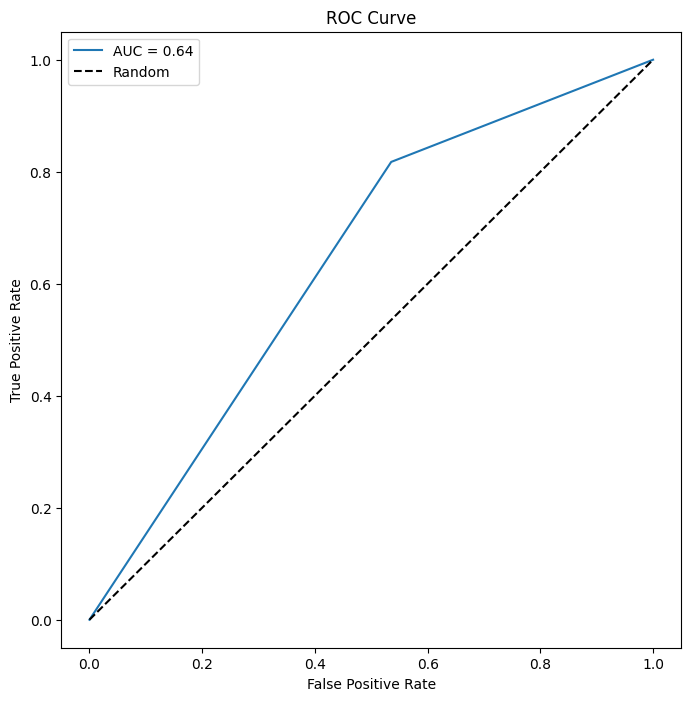

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
# Assuming y_binary_predictions are the predicted binary labels for your test set

# Calculate AUC
auc = roc_auc_score(y_test, y_binary_predictions)
print("AUC:", auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_binary_predictions)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
#explanations code from https://www.kaggle.com/shreyasajal/wids-datathon-2022-explainable-ai-walkthrough

X_test_ft = pd.DataFrame(X_test, columns=column_names)

explainer = shap.Explainer(classifier)
shap_values = explainer(X_test_ft)

shap.summary_plot(shap_values, X_test_ft,plot_type="bar")

TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: KNeighborsClassifier()

In [ ]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

NameError: name 'shap_values' is not defined

In [ ]:
# Create a DataFrame for submission
submission = pd.DataFrame({'patient_id': test['patient_id'], 'DiagPeriodL90D': predictions})

# Save to CSV
submission.to_csv("submission.csv", index=False)

# Check the shape of the DataFrame
print("Shape of submission:", submission.shape)

# Display the first few rows of the DataFrame
submission.head()

NameError: name 'predictions' is not defined

In [25]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import xgboost




!pip install catboost
import catboost
import lightgbm as lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.3 MB/s eta 0:00:00


In [26]:
#splitting into training and validation sets

X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.2, random_state = 50)

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.7 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(random_state=0)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)


In [ ]:
print(y_pred)
# Convert probabilities to binary predictions using a threshold of 0.5
y_binary_predictions = (y_pred >= 0.5).astype(int)
print(y_binary_predictions)


[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [ ]:
# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_binary_predictions))

# Evaluate the model using classification report
print("\nClassification Report:")
print(classification_report(y_test, y_binary_predictions))

# Calculate and print individual metrics
accuracy = accuracy_score(y_test,y_binary_predictions)
precision = precision_score(y_test, y_binary_predictions)
recall = recall_score(y_test, y_binary_predictions)
f1 = f1_score(y_test, y_binary_predictions)

print("\nIndividual Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[ 548  386]
 [ 156 1466]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.59      0.67       934
           1       0.79      0.90      0.84      1622

    accuracy                           0.79      2556
   macro avg       0.78      0.75      0.76      2556
weighted avg       0.79      0.79      0.78      2556


Individual Metrics:
Accuracy: 0.7879499217527387
Precision: 0.7915766738660908
Recall: 0.903822441430333
F1 Score: 0.8439838802533104


AUC: 0.7452731050834749


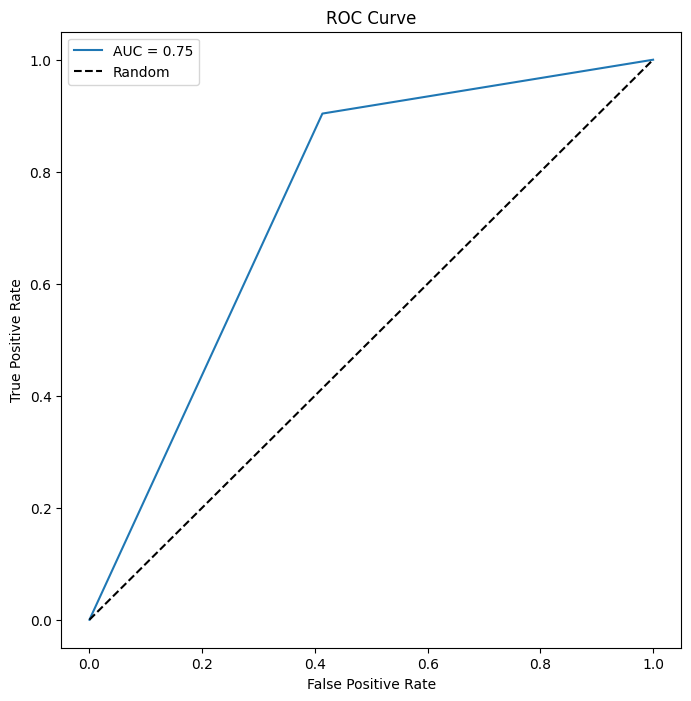

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
# Assuming y_binary_predictions are the predicted binary labels for your test set

# Calculate AUC
auc = roc_auc_score(y_test, y_binary_predictions)
print("AUC:", auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_binary_predictions)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
#explanations code from https://www.kaggle.com/shreyasajal/wids-datathon-2022-explainable-ai-walkthrough

X_test_ft = pd.DataFrame(X_test, columns=column_names)

explainer = shap.Explainer(classifier)
shap_values = explainer(X_test_ft)

shap.summary_plot(shap_values, X_test_ft,plot_type="bar")

TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: SVC(kernel='linear', random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10)

In [ ]:
y_pred = regressor.predict(X_test)
print(y_pred)
# Convert probabilities to binary predictions using a threshold of 0.5
y_binary_predictions = (y_pred >= 0.5).astype(int)
print(y_binary_predictions)


[0.5 1.  0.9 ... 0.9 1.  0.3]
[1 1 1 ... 1 1 0]


In [ ]:
# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_binary_predictions))

# Evaluate the model using classification report
print("\nClassification Report:")
print(classification_report(y_test, y_binary_predictions))

# Calculate and print individual metrics
accuracy = accuracy_score(y_test,y_binary_predictions)
precision = precision_score(y_test, y_binary_predictions)
recall = recall_score(y_test, y_binary_predictions)
f1 = f1_score(y_test, y_binary_predictions)

print("\nIndividual Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[ 522  412]
 [ 145 1477]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.56      0.65       934
           1       0.78      0.91      0.84      1622

    accuracy                           0.78      2556
   macro avg       0.78      0.73      0.75      2556
weighted avg       0.78      0.78      0.77      2556


Individual Metrics:
Accuracy: 0.7820813771517997
Precision: 0.7818951826363155
Recall: 0.9106041923551171
F1 Score: 0.8413557391056679


AUC: 0.7347453509955457


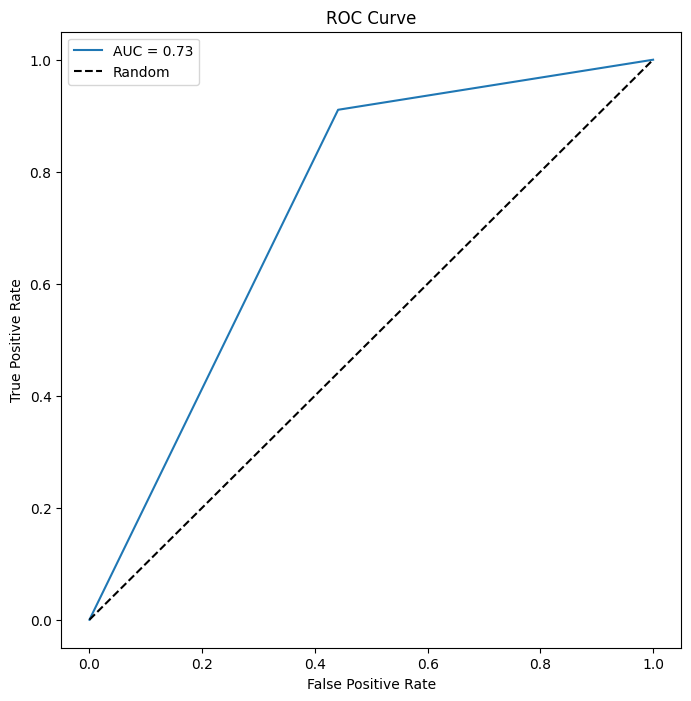

In [ ]:


from sklearn.metrics import roc_auc_score, roc_curve
# Assuming y_binary_predictions are the predicted binary labels for your test set

# Calculate AUC
auc = roc_auc_score(y_test, y_binary_predictions)
print("AUC:", auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_binary_predictions)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
#model training and testing
#Xgboost classifier
xgboost_model = xgboost.XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=10) #gamma=0, subsample=0.75, colsample_bytree=0.4,
xgboost_model.fit(X_train,y_train)
y_pred = xgboost_model.predict(X_test)


In [ ]:
print(y_pred)
# Convert probabilities to binary predictions using a threshold of 0.5
y_binary_predictions = (y_pred >= 0.5).astype(int)
print(y_binary_predictions)


[0.37068444 0.89117306 0.7838869  ... 0.8576379  0.8134752  0.598153  ]
[0 1 1 ... 1 1 1]


In [ ]:
# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_binary_predictions))

# Evaluate the model using classification report
print("\nClassification Report:")
print(classification_report(y_test, y_binary_predictions))

# Calculate and print individual metrics
accuracy = accuracy_score(y_test,y_binary_predictions)
precision = precision_score(y_test, y_binary_predictions)
recall = recall_score(y_test, y_binary_predictions)
f1 = f1_score(y_test, y_binary_predictions)

print("\nIndividual Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[ 569  365]
 [ 194 1428]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.61      0.67       934
           1       0.80      0.88      0.84      1622

    accuracy                           0.78      2556
   macro avg       0.77      0.74      0.75      2556
weighted avg       0.78      0.78      0.78      2556


Individual Metrics:
Accuracy: 0.7812989045383412
Precision: 0.7964305633017289
Recall: 0.8803945745992602
F1 Score: 0.8363103953147877


AUC: 0.7448011416893516


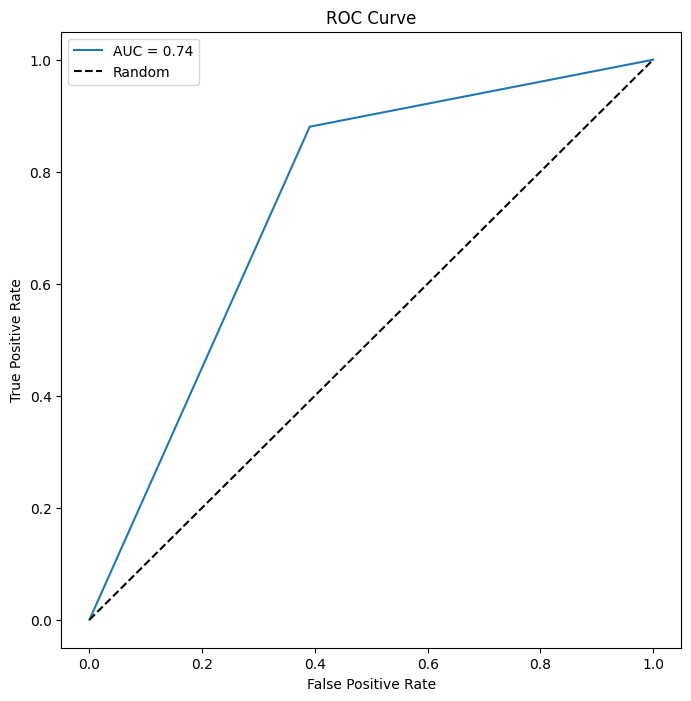

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
# Assuming y_binary_predictions are the predicted binary labels for your test set

# Calculate AUC
auc = roc_auc_score(y_test, y_binary_predictions)
print("AUC:", auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_binary_predictions)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
#explanations code from https://www.kaggle.com/shreyasajal/wids-datathon-2022-explainable-ai-walkthrough

X_test_ft = pd.DataFrame(X_test, columns=column_names)

explainer = shap.Explainer(xgboost_model)
shap_values = explainer(X_test_ft)

shap.summary_plot(shap_values, X_test_ft,plot_type="bar")

KeyboardInterrupt: 

In [ ]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
Confusion Matrix:
[[ 534  400]
 [ 145 1477]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.57      0.66       934
           1       0.79      0.91      0.84      1622

    accuracy                           0.79      2556
   macro avg       0.79      0.74      0.75      2556
weighted avg       0.79      0.79      0.78      2556


Individual Metrics:
Accuracy: 0.7867762128325508
Precision: 0.786893979754928
Recall: 0.9106041923551171
F1 Score: 0.8442412117747927
AUC: 0.7411693338649247


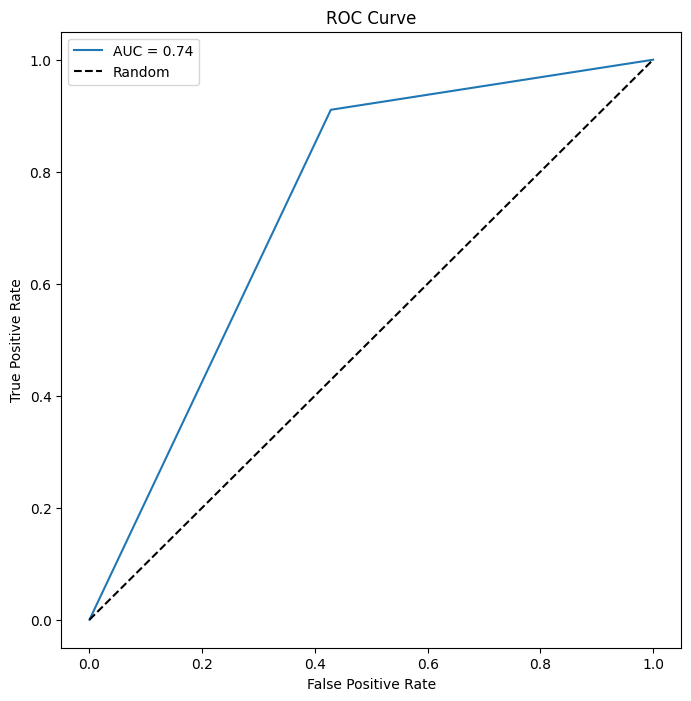

In [ ]:
y_pred = classifier.predict(X_test)
print(y_pred)
# Convert probabilities to binary predictions using a threshold of 0.5
y_binary_predictions = (y_pred >= 0.5).astype(int)
print(y_binary_predictions)
# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_binary_predictions))

# Evaluate the model using classification report
print("\nClassification Report:")
print(classification_report(y_test, y_binary_predictions))

# Calculate and print individual metrics
accuracy = accuracy_score(y_test,y_binary_predictions)
precision = precision_score(y_test, y_binary_predictions)
recall = recall_score(y_test, y_binary_predictions)
f1 = f1_score(y_test, y_binary_predictions)

print("\nIndividual Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
from sklearn.metrics import roc_auc_score, roc_curve
# Assuming y_binary_predictions are the predicted binary labels for your test set

# Calculate AUC
auc = roc_auc_score(y_test, y_binary_predictions)
print("AUC:", auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_binary_predictions)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
Confusion Matrix:
[[ 589  345]
 [ 367 1255]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.63      0.62       934
           1       0.78      0.77      0.78      1622

    accuracy                           0.72      2556
   macro avg       0.70      0.70      0.70      2556
weighted avg       0.72      0.72      0.72      2556


Individual Metrics:
Accuracy: 0.7214397496087637
Precision: 0.784375
Recall: 0.7737361282367448
F1 Score: 0.7790192427063936
AUC: 0.7021785566237257


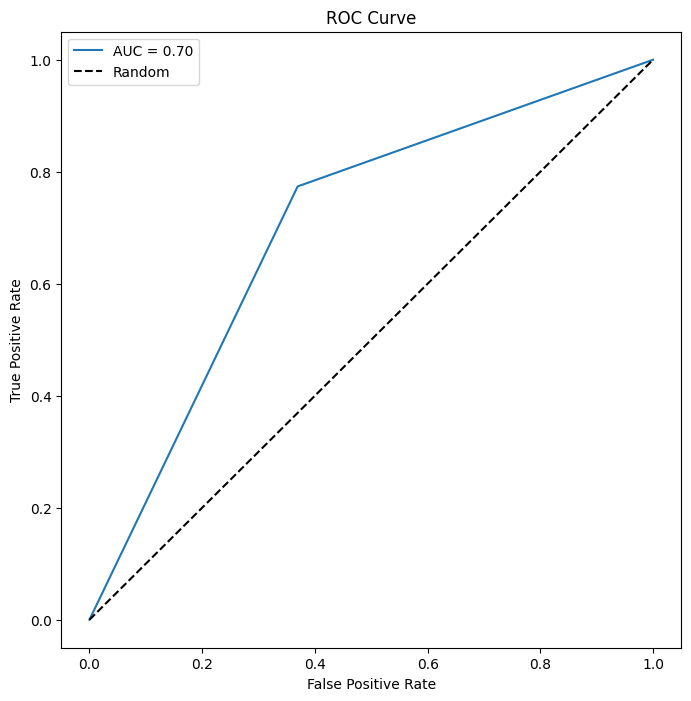

In [ ]:
y_pred = classifier.predict(X_test)
print(y_pred)
# Convert probabilities to binary predictions using a threshold of 0.5
y_binary_predictions = (y_pred >= 0.5).astype(int)
print(y_binary_predictions)
# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_binary_predictions))

# Evaluate the model using classification report
print("\nClassification Report:")
print(classification_report(y_test, y_binary_predictions))

# Calculate and print individual metrics
accuracy = accuracy_score(y_test,y_binary_predictions)
precision = precision_score(y_test, y_binary_predictions)
recall = recall_score(y_test, y_binary_predictions)
f1 = f1_score(y_test, y_binary_predictions)

print("\nIndividual Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
from sklearn.metrics import roc_auc_score, roc_curve
# Assuming y_binary_predictions are the predicted binary labels for your test set

# Calculate AUC
auc = roc_auc_score(y_test, y_binary_predictions)
print("AUC:", auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_binary_predictions)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

[0 1 0 ... 0 1 1]
[0 1 0 ... 0 1 1]
Confusion Matrix:
[[ 579  392]
 [ 142 1443]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.60      0.68       971
           1       0.79      0.91      0.84      1585

    accuracy                           0.79      2556
   macro avg       0.79      0.75      0.76      2556
weighted avg       0.79      0.79      0.78      2556


Individual Metrics:
Accuracy: 0.7910798122065728
Precision: 0.7863760217983651
Recall: 0.910410094637224
F1 Score: 0.8438596491228071
AUC: 0.7533512883072835


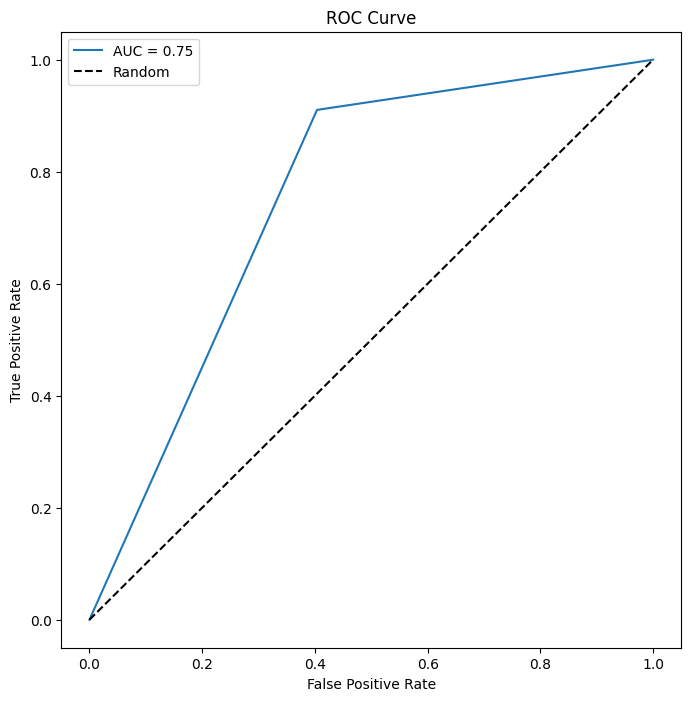

In [ ]:
y_pred = classifier.predict(X_test)
print(y_pred)
# Convert probabilities to binary predictions using a threshold of 0.5
y_binary_predictions = (y_pred >= 0.5).astype(int)
print(y_binary_predictions)
# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_binary_predictions))

# Evaluate the model using classification report
print("\nClassification Report:")
print(classification_report(y_test, y_binary_predictions))

# Calculate and print individual metrics
accuracy = accuracy_score(y_test,y_binary_predictions)
precision = precision_score(y_test, y_binary_predictions)
recall = recall_score(y_test, y_binary_predictions)
f1 = f1_score(y_test, y_binary_predictions)

print("\nIndividual Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
from sklearn.metrics import roc_auc_score, roc_curve
# Assuming y_binary_predictions are the predicted binary labels for your test set

# Calculate AUC
auc = roc_auc_score(y_test, y_binary_predictions)
print("AUC:", auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_binary_predictions)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
from sklearn.svm import SVC
classifier1 = SVC(kernel = 'rbf', random_state = 0)
classifier1.fit( y_pred)

TypeError: BaseLibSVM.fit() missing 1 required positional argument: 'y'

In [ ]:
#model training and testing
#Xgboost classifier
xgboost_model = xgboost.XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=10) #gamma=0, subsample=0.75, colsample_bytree=0.4,
xgboost_model.fit(X_train,y_train)
y_pred = xgboost_model.predict(X_test)


NameError: name 'xgboost' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

[1 1 0 ... 1 1 1]
[1 1 0 ... 1 1 1]
Confusion Matrix:
[[ 579  355]
 [ 295 1327]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.62      0.64       934
           1       0.79      0.82      0.80      1622

    accuracy                           0.75      2556
   macro avg       0.73      0.72      0.72      2556
weighted avg       0.74      0.75      0.74      2556


Individual Metrics:
Accuracy: 0.7456964006259781
Precision: 0.7889417360285375
Recall: 0.8181257706535142
F1 Score: 0.8032687651331719
AUC: 0.7190200587742946


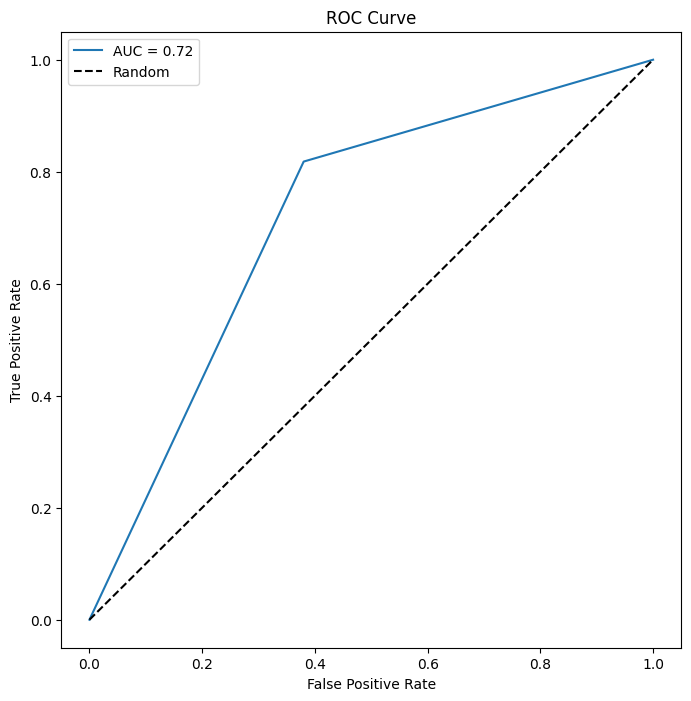

In [ ]:
y_pred = classifier.predict(X_test)
print(y_pred)
# Convert probabilities to binary predictions using a threshold of 0.5
y_binary_predictions = (y_pred >= 0.5).astype(int)
print(y_binary_predictions)
# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_binary_predictions))

# Evaluate the model using classification report
print("\nClassification Report:")
print(classification_report(y_test, y_binary_predictions))

# Calculate and print individual metrics
accuracy = accuracy_score(y_test,y_binary_predictions)
precision = precision_score(y_test, y_binary_predictions)
recall = recall_score(y_test, y_binary_predictions)
f1 = f1_score(y_test, y_binary_predictions)

print("\nIndividual Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
from sklearn.metrics import roc_auc_score, roc_curve
# Assuming y_binary_predictions are the predicted binary labels for your test set

# Calculate AUC
auc = roc_auc_score(y_test, y_binary_predictions)
print("AUC:", auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_binary_predictions)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

[0.7 0.8 0.3 ... 0.6 1.  0.7]
[1 1 0 ... 1 1 1]
Confusion Matrix:
[[ 533  401]
 [ 144 1478]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.57      0.66       934
           1       0.79      0.91      0.84      1622

    accuracy                           0.79      2556
   macro avg       0.79      0.74      0.75      2556
weighted avg       0.79      0.79      0.78      2556


Individual Metrics:
Accuracy: 0.7867762128325508
Precision: 0.7865886109632784
Recall: 0.9112207151664612
F1 Score: 0.8443301913738932
AUC: 0.7409422633648152


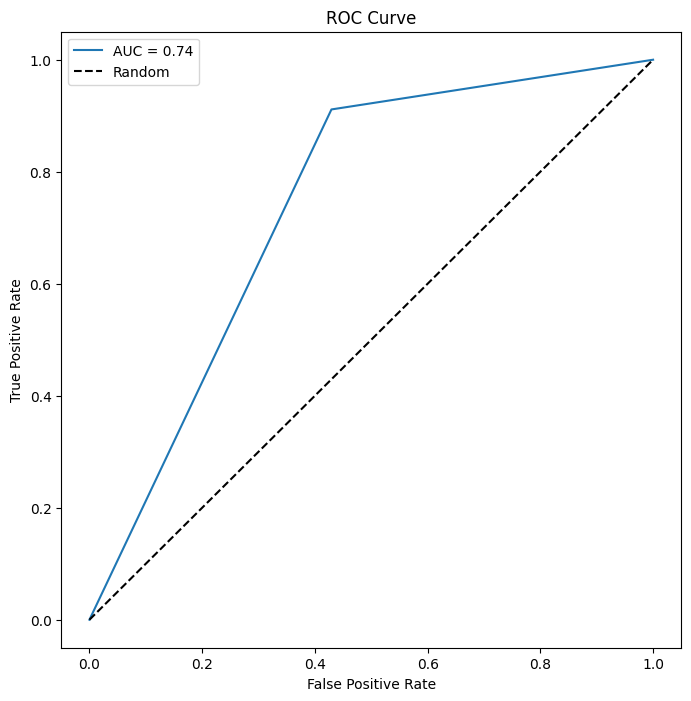

In [ ]:
y_pred = regressor.predict(X_test)
print(y_pred)
# Convert probabilities to binary predictions using a threshold of 0.5
y_binary_predictions = (y_pred >= 0.5).astype(int)
print(y_binary_predictions)
# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_binary_predictions))

# Evaluate the model using classification report
print("\nClassification Report:")
print(classification_report(y_test, y_binary_predictions))

# Calculate and print individual metrics
accuracy = accuracy_score(y_test,y_binary_predictions)
precision = precision_score(y_test, y_binary_predictions)
recall = recall_score(y_test, y_binary_predictions)
f1 = f1_score(y_test, y_binary_predictions)

print("\nIndividual Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
from sklearn.metrics import roc_auc_score, roc_curve
# Assuming y_binary_predictions are the predicted binary labels for your test set

# Calculate AUC
auc = roc_auc_score(y_test, y_binary_predictions)
print("AUC:", auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_binary_predictions)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` exp

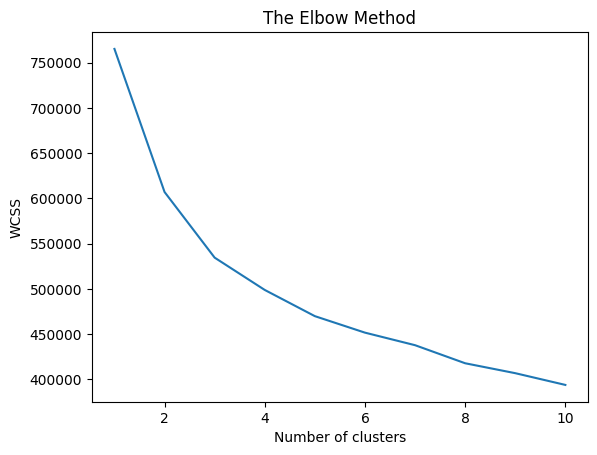

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train, y_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)


In [ ]:
y_kmeans = kmeans.fit_predict(X_train, y_train)

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


KeyError: 'key of type tuple not found and not a MultiIndex'

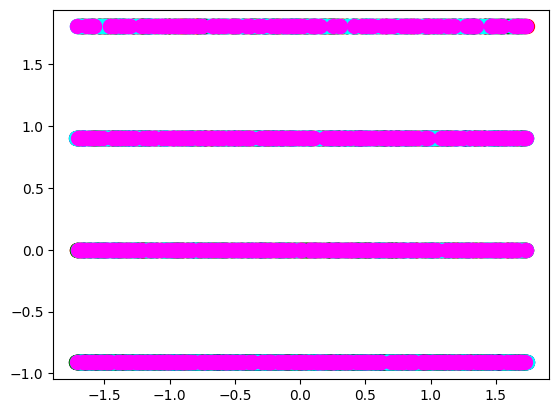

In [ ]:
plt.scatter(X_train[y_kmeans == 0, 0], X_train[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_train[y_kmeans == 1, 0], X_train[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_train[y_kmeans == 2, 0],X_train[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_train[y_kmeans == 3, 0], X_train[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_train[y_kmeans == 4, 0], X_train[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(y_train[y_kmeans == 0, 0], y_train[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(y_train[y_kmeans == 1, 0], y_train[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(y_train[y_kmeans == 2, 0],y_train[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(y_train[y_kmeans == 3, 0], y_train[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(y_train[y_kmeans == 4, 0], y_train[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [27]:
import tensorflow as tf
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=4096, activation='relu'))

In [28]:
ann.add(tf.keras.layers.Dense(units=2048, activation='relu'))

In [29]:
ann.add(tf.keras.layers.Dense(units=1024, activation='relu'))

In [30]:
ann.add(tf.keras.layers.Dense(units=512, activation='relu'))

In [31]:
ann.add(tf.keras.layers.Dense(units=256, activation='relu'))

In [32]:
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [33]:
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))

In [34]:
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))

In [35]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [36]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [37]:
ann.fit(X_train, y_train, batch_size = 8, epochs = 150)

Epoch 1/150
1278/1278 [==============================] - 50s 37ms/step - loss: 0.5540 - accuracy: 0.7550
Epoch 2/150
1278/1278 [==============================] - 45s 35ms/step - loss: 0.5105 - accuracy: 0.7886
Epoch 3/150
1278/1278 [==============================] - 45s 35ms/step - loss: 0.5061 - accuracy: 0.7892
Epoch 4/150
1278/1278 [==============================] - 44s 35ms/step - loss: 0.5034 - accuracy: 0.7895
Epoch 5/150
1278/1278 [==============================] - 46s 36ms/step - loss: 0.4926 - accuracy: 0.7962
Epoch 6/150
1278/1278 [==============================] - 45s 35ms/step - loss: 0.4863 - accuracy: 0.7977
Epoch 7/150
1278/1278 [==============================] - 45s 35ms/step - loss: 0.4876 - accuracy: 0.8016
Epoch 8/150
1278/1278 [==============================] - 45s 35ms/step - loss: 0.4844 - accuracy: 0.8006
Epoch 9/150
1278/1278 [==============================] - 45s 35ms/step - loss: 0.4788 - accuracy: 0.8017
Epoch 10/150
1278/1278 [==============================]

In [38]:
y_pred = ann.predict(X_test)
print(y_pred)
# Convert probabilities to binary predictions using a threshold of 0.5
y_binary_predictions = (y_pred >= 0.5).astype(int)
print(y_binary_predictions)


80/80 [==============================] - 1s 8ms/step
[[0.9947471 ]
 [1.        ]
 [0.9804536 ]
 ...
 [0.0085172 ]
 [0.18620111]
 [0.99931806]]
[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [1]]


In [39]:
# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_binary_predictions))

# Evaluate the model using classification report
print("\nClassification Report:")
print(classification_report(y_test, y_binary_predictions))

# Calculate and print individual metrics
accuracy = accuracy_score(y_test,y_binary_predictions)
precision = precision_score(y_test, y_binary_predictions)
recall = recall_score(y_test, y_binary_predictions)
f1 = f1_score(y_test, y_binary_predictions)

print("\nIndividual Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[ 598  369]
 [ 364 1225]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       967
           1       0.77      0.77      0.77      1589

    accuracy                           0.71      2556
   macro avg       0.70      0.69      0.69      2556
weighted avg       0.71      0.71      0.71      2556


Individual Metrics:
Accuracy: 0.7132237871674492
Precision: 0.7685069008782937
Recall: 0.7709251101321586
F1 Score: 0.7697141061891297


AUC: 0.6946662779202675


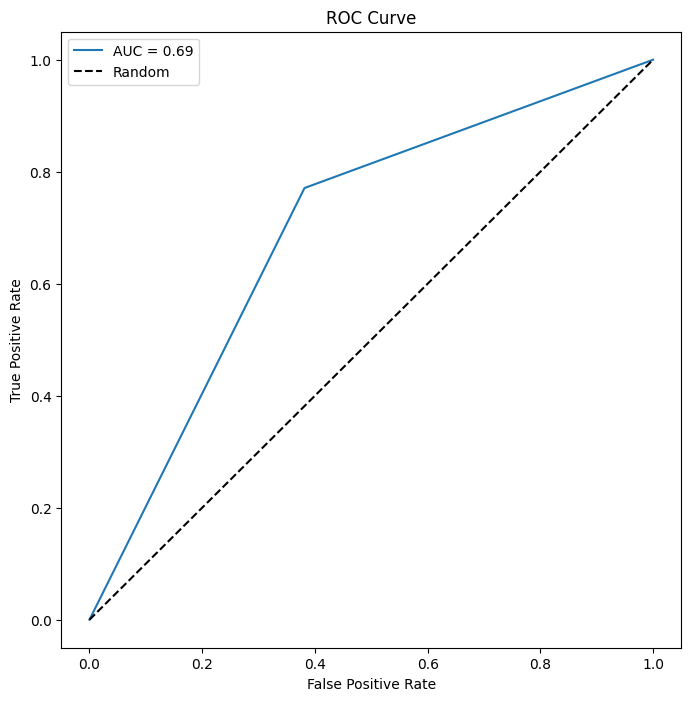

In [40]:
from sklearn.metrics import roc_auc_score, roc_curve
# Assuming y_binary_predictions are the predicted binary labels for your test set

# Calculate AUC
auc = roc_auc_score(y_test, y_binary_predictions)
print("AUC:", auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_binary_predictions)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [41]:
ann.fit(X_train, y_train, batch_size = 8, epochs = 50)

Epoch 1/50
1278/1278 [==============================] - 49s 38ms/step - loss: 0.1009 - accuracy: 0.9595
Epoch 2/50
1278/1278 [==============================] - 46s 36ms/step - loss: 0.1033 - accuracy: 0.9597
Epoch 3/50
1278/1278 [==============================] - 44s 34ms/step - loss: 0.0943 - accuracy: 0.9582
Epoch 4/50
1278/1278 [==============================] - 46s 36ms/step - loss: 0.0863 - accuracy: 0.9623
Epoch 5/50
1278/1278 [==============================] - 45s 35ms/step - loss: 0.0982 - accuracy: 0.9588
Epoch 6/50
1278/1278 [==============================] - 46s 36ms/step - loss: 0.0946 - accuracy: 0.9591
Epoch 7/50
1278/1278 [==============================] - 44s 35ms/step - loss: 0.0975 - accuracy: 0.9592
Epoch 8/50
1278/1278 [==============================] - 47s 36ms/step - loss: 0.1190 - accuracy: 0.9568
Epoch 9/50
1278/1278 [==============================] - 45s 35ms/step - loss: 0.0816 - accuracy: 0.9637
Epoch 10/50
1278/1278 [==============================] - 45s 35m

In [42]:
ann.fit(X_train, y_train, batch_size = 8, epochs = 50)

Epoch 1/50
1278/1278 [==============================] - 64s 50ms/step - loss: 0.0854 - accuracy: 0.9660
Epoch 2/50
1278/1278 [==============================] - 43s 34ms/step - loss: 0.0908 - accuracy: 0.9638
Epoch 3/50
1278/1278 [==============================] - 45s 35ms/step - loss: 0.0770 - accuracy: 0.9690
Epoch 4/50
1278/1278 [==============================] - 43s 34ms/step - loss: 0.0868 - accuracy: 0.9660
Epoch 5/50
1278/1278 [==============================] - 44s 35ms/step - loss: 0.0903 - accuracy: 0.9655
Epoch 6/50
1278/1278 [==============================] - 43s 34ms/step - loss: 0.0791 - accuracy: 0.9680
Epoch 7/50
1278/1278 [==============================] - 44s 35ms/step - loss: 0.0769 - accuracy: 0.9656
Epoch 8/50
1278/1278 [==============================] - 43s 34ms/step - loss: 0.0840 - accuracy: 0.9681
Epoch 9/50
1278/1278 [==============================] - 44s 34ms/step - loss: 0.0938 - accuracy: 0.9648
Epoch 10/50
1278/1278 [==============================] - 45s 35m

In [43]:
ann.fit(X_train, y_train, batch_size = 8, epochs = 100)

Epoch 1/100
1278/1278 [==============================] - 56s 44ms/step - loss: 0.1746 - accuracy: 0.9606
Epoch 2/100
1278/1278 [==============================] - 44s 34ms/step - loss: 0.0701 - accuracy: 0.9758
Epoch 3/100
1278/1278 [==============================] - 45s 36ms/step - loss: 0.0657 - accuracy: 0.9765
Epoch 4/100
1278/1278 [==============================] - 44s 34ms/step - loss: 0.0866 - accuracy: 0.9697
Epoch 5/100
1278/1278 [==============================] - 44s 35ms/step - loss: 0.0642 - accuracy: 0.9772
Epoch 6/100
1278/1278 [==============================] - 44s 34ms/step - loss: 0.0698 - accuracy: 0.9727
Epoch 7/100
1278/1278 [==============================] - 44s 35ms/step - loss: 0.0878 - accuracy: 0.9698
Epoch 8/100
1278/1278 [==============================] - 44s 34ms/step - loss: 0.0759 - accuracy: 0.9703
Epoch 9/100
1278/1278 [==============================] - 44s 35ms/step - loss: 0.1211 - accuracy: 0.9601
Epoch 10/100
1278/1278 [==============================]